Aluno:Pedro Siade Ferreira
Matricula: 202004734
2.
Em Processamento de Histograma (Gonzalez, Seção 3.3) você pode revisar o que já aprendeu sobre
histogramas e que já implementou (com e sem binning). Na Seção 3.3.1 (pág. 79) é apresentada a
Equalização de Histograma. Resolva o Exemplo 3.5 do Gonzalez.
Submeta seu notebook no modo padrão e prepare/submeta uma apresentação estilo .pptx no G.
Classroom.

In [ ]:
%matplotlib inline
import cv2 # importa opencv
import numpy as np # importa numpy
import matplotlib.pyplot as plt
import sys

Nessa parte será realizado o exemplo 5. No livro suponha-se uma imagem de 3 bits, 64x64, oqual possuía as seguinte distribuição:






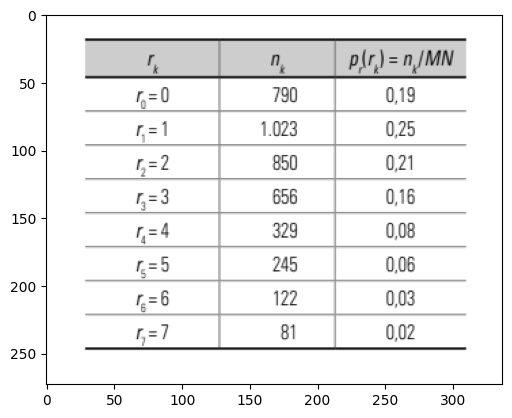

In [2]:
imagem = cv2.imread('imagens/Captura de tela 2023-06-21 143104.png', cv2.IMREAD_GRAYSCALE)
plt.imshow(imagem, cmap='gray')

Foi tentado obter uma tabela com valores próximo a fim de realizar o exemplo:

In [3]:
matriz = np.zeros((64, 64))

In [4]:
for i in range(0, 11):
  for j in range(0, 64):
    matriz[i][j]=0
for i in range(11, 27):
  for j in range(0, 64):
    matriz[i][j]=1
for i in range(27, 39):
  for j in range(0, 64):
    matriz[i][j]=2
for i in range(39, 49):
  for j in range(0, 64):
    matriz[i][j]=3
for i in range(49, 54):
  for j in range(0, 64):
    matriz[i][j]=4
for i in range(54, 59):
  for j in range(0, 64):
    matriz[i][j]=5
for i in range(59, 62):
  for j in range(0, 64):
    matriz[i][j]=6
for i in range(62, 64):
  for j in range(0, 64):
    matriz[i][j]=7


In [5]:
def computa_histograma2(img):
    h = np.zeros(8, int)
    for u in range(0,64):
        for v in range(0,64):
            i = int(img[u,v])
            h[i] = h[i]+1
    return h

[ 704 1024  768  640  320  320  192  128]


<BarContainer object of 8 artists>

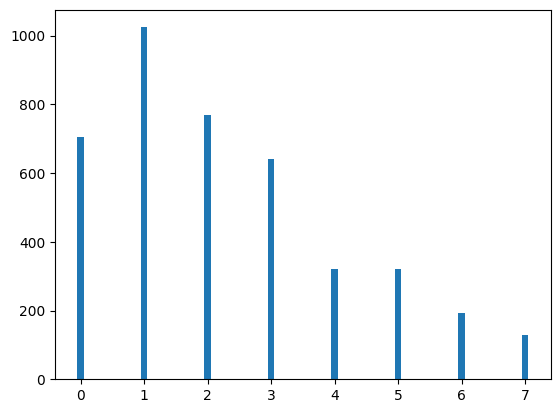

In [6]:
h2= computa_histograma2(matriz)
print(h2)
plt.bar(range(0,8), h2, 0.1)


Percebe-se que há uma aproximação entre a matriz que fizemos e a tabela citado, então espera-se resultados próximos.

Na função abaixo é calculado a probabilidade de ocorrencia de um nivel de intensidade rk(pr):

M e N, numero de linhas e coluna

$pr(rk)=\frac{rk}{M*N}$


In [7]:
def pr(h, l, c):
  x = np.zeros(8, dtype = float)
  for i in range(0, 8):
    x[i]=float(h[i]/(l*c))
  return x

Com a probabilidade de ocorrência é possível determinar a transformação/ equalização de histograma T(rk)/sk:

Na primeira função é realizado o somatório equivalente a integral da equação 3.3-6

Depois o mesmo é multilpicado tendo assim a função de transformação:

In [8]:
def somatorio(pr):
  somatorio = np.zeros(8, dtype = float)
  for i in range(0,8):
    if i>0:
      somatorio[i]= pr[i] + somatorio[i-1]
    else:
      somatorio[i]= pr[i]
  return somatorio

In [9]:
def transformacao(s):
  for i in range(0,8):
    s[i]=np.round(s[i]*7)
  return s

Probalidade de ocorrencia: [0.171875 0.25     0.1875   0.15625  0.078125 0.078125 0.046875 0.03125 ]


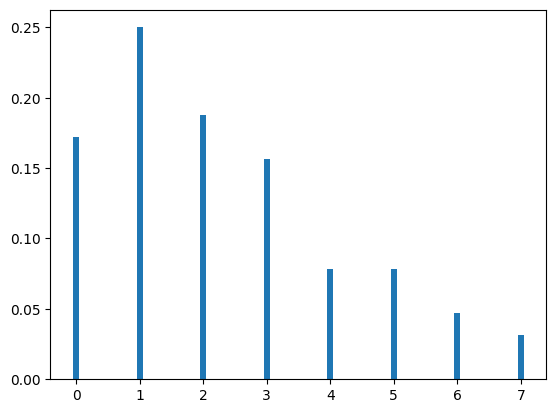

In [10]:
h2= computa_histograma2(matriz)
probOcorrencia = pr(h2, 64, 64)
plt.bar(range(0,8), probOcorrencia, 0.1)
print(f'Probalidade de ocorrencia: {probOcorrencia}')

Função de transformação: [1. 3. 4. 5. 6. 6. 7. 7.]


<BarContainer object of 8 artists>

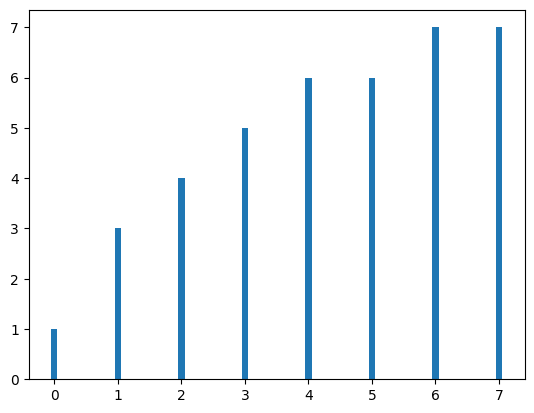

In [11]:
s=somatorio(probOcorrencia)
Transformacao=transformacao(s)
print(f'Função de transformação: {Transformacao}')
plt.bar(range(0,8), Transformacao, 0.1)


Com a função de transformação e a probabilidade de ocorerência já é possível realizar o histograma equalizado:

In [12]:
def histogramaEqualizado(n, s):
  x = np.zeros(8, dtype = float)
  for i in range(0,8):
    y=int(s[i])#y funciona como uma variavel auxiliar, lembrando que s[0] esta conecatado com n[0]
    x[y]=n[i]+x[y]#a coneção é realizada aqui
  return x



[0.       0.171875 0.       0.25     0.1875   0.15625  0.15625  0.078125]


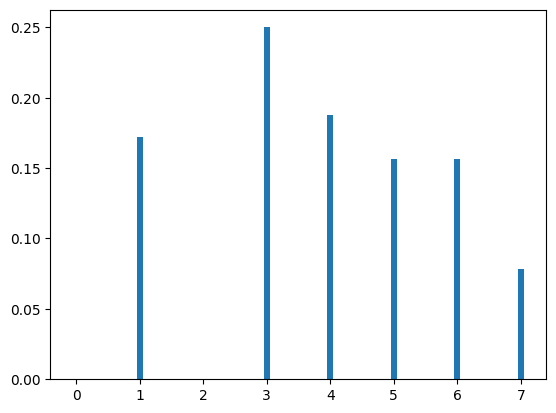

In [13]:
j=histogramaEqualizado(probOcorrencia,Transformacao)
plt.bar(range(0,8), j, 0.1)
print(j)


Com toda analise e comparação com resultados obtidos pode perceber que o objetivo foi realizado, conseguindo alcançar resultados próximo com o exemplo 5, uma vez o resultado é compativel com o do exemplo havendo pequenas diferenças por conta das matrizes não serem identicas.